<a href="https://colab.research.google.com/github/constructor-s/csc413-winter-2021/blob/main/a4/PA4_Part_2_StyleGAN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **University of Toronto - CSC413 - Neural Networks and Deep Learning** 
## **Programming Assignment 4 - StyleGAN2-Ada**

This is a self-contained notebook that allows you to play around with a pre-trained StyleGAN2-Ada generator

Disclaimer: Some codes were borrowed from StyleGAN official documentation on Github https://github.com/NVlabs/stylegan

Make sure to set your runtime to GPU

Remember to save your progress periodically!

In [1]:
# Run this for Google CoLab (use TensorFlow 1.x)
%tensorflow_version 1.x

# clone StyleGAN2 Ada
!git clone https://github.com/NVlabs/stylegan2-ada.git

TensorFlow 1.x selected.
Cloning into 'stylegan2-ada'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71
Unpacking objects: 100% (71/71), done.


In [2]:
#setup some environments (Do not change any of the following)
import sys
import pickle
import os
import numpy as np
from IPython.display import Image
import PIL.Image
from PIL import Image
import matplotlib.pyplot as plt

sys.path.insert(0, "/content/stylegan2-ada") #do not remove this line

import dnnlib
import dnnlib.tflib as tflib
import IPython.display
from google.colab import files

Next, we will load a pre-trained StyleGan2-ada network.

Each of the following pre-trained network is specialized to generate one type of image.

In [3]:
# The pre-trained networks are stored as standard pickle files
# Uncomment one of the following URL to begin
# If you wish, you can also find other pre-trained networks online

URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"      # Human faces
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/cifar10.pkl"  # CIFAR10, these images are a bit too tiny for our experiment 
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqwild.pkl" # wild animal pictures
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/metfaces.pkl" # European portrait paintings
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqcat.pkl"  # cats
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/afhqdog.pkl"  # dogs
tflib.init_tf() #this creates a default Tensorflow session

# we are now going to load the StyleGAN2-Ada model 
# The following code downloads the file and unpickles it to yield 3 instances of dnnlib.tflib.Network. 
with dnnlib.util.open_url(URL) as fp:
    _G, _D, Gs = pickle.load(fp) 
# Here is a brief description of _G, _D, Gs, for details see the official StyleGAN documentation 
# _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
# _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
# Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.
# We will work with Gs 

## Part 1 Sampling and Identifying Fakes 

Open: https://github.com/NVlabs/stylegan and follow the instructions starting from *There are three ways to use the pre-trained generator....*

Complete generate_latent_code and generate_images function in the Colab notebook to generate a small row of $3 - 5$ images. 

You do not need to include these images into your PDF submission. 

If you wish, you can try to use https://www.whichfaceisreal.com/learn.html as a guideline to spot any imperfections that you detect in these images, e.g., ``blob artifact" and make a short remark for your attached images. 

In [ ]:
# Sample a batch of latent codes {z_1, ...., z_B}, B is your batch size.  
def generate_latent_code(SEED, BATCH, LATENT_DIMENSION = 512):
  """
  This function returns a sample a batch of 512 dimensional random latent code

  - SEED: int
  - BATCH: int that specifies the number of latent codes, Recommended batch_size is 3 - 6
  - LATENT_DIMENSION is by default 512 (see Karras et al.)
  
  You should use np.random.RandomState to construct a random number generator, say rnd
  Then use rnd.randn along with your BATCH and LATENT_DIMENSION to generate your latent codes. 
  This samples a batch of latent codes from a normal distribution 
  https://numpy.org/doc/stable/reference/random/generated/numpy.random.RandomState.randn.html
  
  Return latent_codes, which is a 2D array with dimensions BATCH times LATENT_DIMENSION 
  """
  ################################################################################
  ########################## COMPLETE THE FOLLOWING ##############################
  ################################################################################
  rnd = np.random.RandomState(SEED)
  latent_codes = rnd.randn(BATCH, LATENT_DIMENSION)
  ################################################################################
  return latent_codes

In [ ]:
# Sample images from your latent codes https://github.com/NVlabs/stylegan
# You can use their default settings

################################################################################
########################## COMPLETE THE FOLLOWING ##############################
################################################################################
def generate_images(SEED, BATCH, TRUNCATION = 0.7):
  """
  This function generates a batch of images from latent codes. 
  
  - SEED: int
  - BATCH: int that specifies the number of latent codes to be generated
  - TRUNCATION: float between [-1, 1] that decides the amount of clipping to apply to the latent code distribution
              recommended setting is 0.7

  You will use Gs.run() to sample images. See https://github.com/NVlabs/stylegan for details
  You may use their default setting.  
  """ 
  # Sample a batch of latent code z using generate_latent_code function
  latent_codes = generate_latent_code(SEED, BATCH)

  # Convert latent code into images by following https://github.com/NVlabs/stylegan
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latent_codes, None, truncation_psi=TRUNCATION, 
                  randomize_noise=True, output_transform=fmt)
  return PIL.Image.fromarray(np.concatenate(images, axis=1) , 'RGB')
################################################################################

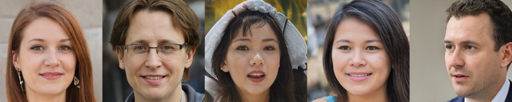

In [ ]:
# Generate your images
im = generate_images(0, 5)
im.thumbnail((512, 512))
im

## **Part 2 Interpolation**

Complete the interpolate_images function using linear interpolation between two latent codes,
\begin{equation}
    z = r z_1 + (1-r) z_2,  r \in [0, 1]
\end{equation}
and feeding this interpolation through the StyleGAN2-Ada generator Gs as done in generate_images. Include a small row of interpolation in your PDF submission as a screen shot if necessary to keep the file size small. 

In [ ]:
################################################################################
########################## COMPLETE THE FOLLOWING ##############################
################################################################################
def interpolate_images(SEED1, SEED2, INTERPOLATION, BATCH = 1, TRUNCATION = 0.7):
  """
  - SEED1, SEED2: int, seed to use to generate the two latent codes
  - INTERPOLATION: int, the number of interpolation between the two images, recommended setting 6 - 10
  - BATCH: int, the number of latent code to generate. In this experiment, it is 1. 
  - TRUNCATION: float between [-1, 1] that decides the amount of clipping to apply to the latent code distribution
              recommended setting is 0.7

  You will interpolate between two latent code that you generate using the above formula
  You can generate an interpolation variable using np.linspace
  https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  
  This function should return an interpolated image. Include a screenshot in your submission.
  """
  latent_code_1 = generate_latent_code(SEED1, BATCH)
  latent_code_2 = generate_latent_code(SEED2, BATCH)
  r = np.linspace(0, 1, INTERPOLATION)
  latent_codes = (r.reshape(-1, 1) @ latent_code_1 + 
                  (1-r).reshape(-1, 1) @ latent_code_2)
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latent_codes, None, truncation_psi=TRUNCATION, 
                  randomize_noise=True, output_transform=fmt)
  
  return PIL.Image.fromarray(np.concatenate(images, axis=1) , 'RGB')
################################################################################

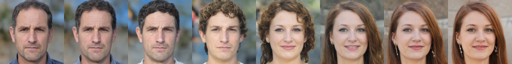

In [ ]:
# Create an interpolation of your generated images
im = interpolate_images(0, 1, 8)
im.thumbnail((512, 512))
im

After you have generated interpolated images, an interesting task would be to see how you can create a GIF. Feel free to explore a little bit more. 

## **Part 3 Style Mixing and Fine Control**
In the final part, you will reproduce the famous style mixing example from the original StyleGAN paper.

### Step 1. We will first learn how to generate from sub-networks of the StyleGAN generator. 

In [5]:
# You will generate images from sub-networks of the StyleGAN generator
# Similar to Gs, the sub-networks are represented as independent instances of dnnlib.tflib.Network
# Complete the function by following \url{https://github.com/NVlabs/stylegan} 
# And Look up Gs.components.mapping,  Gs.components.synthesism, Gs.get_var
# Remember to use the truncation trick as described in the handout after you obtain src_dlatents from Gs.components.mapping.run
def generate_from_subnetwork(src_seeds, LATENT_DIMENSION = 512):
    """
    - src_seeds: a list of int, where each int is used to generate a latent code, e.g., [1,2,3]
    - LATENT_DIMENSION: by default 512

    You will complete the code snippet in the Write Your Code Here block
    This generates several images from a sub-network of the genrator. 

    To prevent mistakes, we have provided the variable names which corresponds to the ones in the StyleGAN documentation
    You should use their convention. 
    """

    # default arguments to Gs.components.synthesis.run, this is given to you. 
    synthesis_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False,
        'minibatch_size': 4
    }
    ############################################################################
    ########################## WRITE YOUR CODE HERE ############################
    ############################################################################
    truncation = 0.7
    src_latents = np.stack(np.random.RandomState(seed).randn(LATENT_DIMENSION) 
                                                        for seed in src_seeds)
    src_dlatents = Gs.components.mapping.run(src_latents, None) 
                                                    # [seed, layer, component]
    w_avg = Gs.get_var('dlatent_avg')
    src_dlatents = w_avg + (src_dlatents-w_avg)*truncation
    all_images = Gs.components.synthesis.run(src_dlatents, **synthesis_kwargs)
    ############################################################################
    return PIL.Image.fromarray(np.concatenate(all_images, axis=1) , 'RGB')

Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.


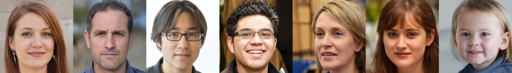

In [6]:
# generate several iamges from the sub-network
im = generate_from_subnetwork(src_seeds=[0, 1, 2, 3, 4, 5, 6])
im.thumbnail((512, 512))
im

### Step 2. Initialize the col_seeds, row_seeds and col_styles and generate a grid of image. 

A recommended example for your experiment is as follows:

*  col_seeds = [1, 2, 3, 4, 5]
*  row_seeds = [6]
*  col_styles = [1, 2, 3, 4, 5]

and

*  col_seeds = [1, 2, 3, 4, 5]
*  row_seeds = [6]
*  col_styles = [8, 9, 10, 11, 12]

You will then incorporate your code from generate from sub_network into the cell below. 

Experiment with the col_styles variable. Explain what col_styles does, for instance, roughly describe what these numbers corresponds to. Create a simple experiment to backup your argument. Include **at maximum two** sets of images that illustrates the effect of changing col_styles and your explanation. Include them as screen shots to minimize the size of the file.

Make reference to the original StyleGAN or the StyleGAN2 paper by Karras et al. as needed https://arxiv.org/pdf/1812.04948.pdf https://arxiv.org/pdf/1912.04958.pdf

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


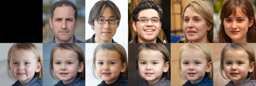

In [9]:
################################################################################
####################COMPLETE THE NEXT THREE LINES###############################
################################################################################
col_seeds = [1, 2, 3, 4, 5]
row_seeds = [6]
col_styles = [8, 9, 10, 11, 12]
################################################################################
src_seeds = list(set(row_seeds + col_seeds))

# default arguments to Gs.components.synthesis.run, do not change
synthesis_kwargs = {
    'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
    'randomize_noise': False,
    'minibatch_size': 4
}
################################################################################
########################## COMPLETE THE FOLLOWING ##############################
################################################################################
# Copy the   #### WRITE YOUR CODE HERE #### portion from generate_from_subnetwork()

############################################################################
truncation = 0.7
src_latents = np.stack(np.random.RandomState(seed).randn(512) 
                                                    for seed in src_seeds)
src_dlatents = Gs.components.mapping.run(src_latents, None) 
                                                # [seed, layer, component]
w_avg = Gs.get_var('dlatent_avg')
src_dlatents = w_avg + (src_dlatents-w_avg)*truncation
all_images = Gs.components.synthesis.run(src_dlatents, **synthesis_kwargs)
############################################################################

################################################################################

# (Do not change)
image_dict = {(seed, seed): image for seed, image in zip(src_seeds, list(all_images))}
w_dict = {seed: w for seed, w in zip(src_seeds, list(src_dlatents))} 

# Generating Images (Do not Change)
for row_seed in row_seeds:
    for col_seed in col_seeds:
        w = w_dict[row_seed].copy()
        w[col_styles] = w_dict[col_seed][col_styles]
        image = Gs.components.synthesis.run(w[np.newaxis], **synthesis_kwargs)[0]
        image_dict[(row_seed, col_seed)] = image

# Create an Image Grid (Do not Change)
def create_grid_images(): 
  _N, _C, H, W = Gs.output_shape
  canvas = PIL.Image.new('RGB', (W * (len(col_seeds) + 1), H * (len(row_seeds) + 1)), 'black')
  for row_idx, row_seed in enumerate([None] + row_seeds):
      for col_idx, col_seed in enumerate([None] + col_seeds):
          if row_seed is None and col_seed is None:
              continue
          key = (row_seed, col_seed)
          if row_seed is None:
              key = (col_seed, col_seed)
          if col_seed is None:
              key = (row_seed, row_seed)
          canvas.paste(PIL.Image.fromarray(image_dict[key], 'RGB'), (W * col_idx, H * row_idx))
  return canvas

# The following code will create your image, save it as a png, and display the image
# Run the following code after you have set your row_seed, col_seed and col_style
image_grid = create_grid_images()

image_grid.thumbnail((512, 512)) # Reduce image size

image_grid.save('image_grid.png')
im = Image.open("image_grid.png")
im.thumbnail((256, 256)) # Reduce image size
im